In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data=pd.read_csv("cruise_ship_info.csv")
data

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [11]:
data.shape

(158, 9)

In [12]:
data.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [13]:
data.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [18]:
data["Cruise_line"].nunique()

20

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a=le.fit_transform(data["Cruise_line"])
data["Cruise_line"]=a

In [24]:
data["Cruise_line"].corr(data["crew"])

-0.21168714292828603

In [17]:
data["Tonnage"].corr(data["crew"])

0.9275688115449396

In [28]:
data1=data.drop(["Ship_name","Cruise_line"], axis=1)
data1

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,6,30.277,6.94,5.94,3.55,42.64,3.55
1,6,30.277,6.94,5.94,3.55,42.64,3.55
2,26,47.262,14.86,7.22,7.43,31.80,6.70
3,11,110.000,29.74,9.53,14.88,36.99,19.10
4,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59
154,14,76.800,19.60,8.79,9.67,39.18,12.00
155,25,5.350,1.58,4.40,0.74,33.86,0.88
156,27,5.350,1.67,4.40,0.74,32.04,0.88


In [48]:
data.groupby(["Age","Tonnage","passengers","length","cabins"]).describe()

Cruise_line                              \
                                           count  mean std   min   25%   50%   
Age Tonnage passengers length cabins                                           
4   220.000 54.00      11.82  27.00          1.0  15.0 NaN  15.0  15.0  15.0   
5   86.000  21.04      9.36   10.22          1.0   7.0 NaN   7.0   7.0   7.0   
    115.000 35.74      9.00   15.32          1.0  12.0 NaN  12.0  12.0  12.0   
    122.000 28.50      10.33  6.87           1.0   2.0 NaN   2.0   2.0   2.0   
    133.500 39.59      10.93  16.37          1.0   8.0 NaN   8.0   8.0   8.0   
...                                          ...   ...  ..   ...   ...   ...   
31  35.143  12.50      6.69   5.32           1.0   8.0 NaN   8.0   8.0   8.0   
36  16.852  9.52       5.41   3.83           1.0   8.0 NaN   8.0   8.0   8.0   
40  28.000  11.50      6.74   4.00           1.0   9.0 NaN   9.0   9.0   9.0   
44  70.327  17.91      9.63   9.50           1.0   5.0 NaN   5.0   5.0   5.0   
48  22.080  8.26       5.78   4.25           1.0  11.0 NaN  11.0  11.0  11.0   

                                                 passenger_density         \
                                       75%   max             count   mean   
Age Tonnage passengers length cabins                                        
4   220.000 54.00      11.82  27.00   15.0  15.0               1.0  40.74   
5   86.000  21.04      9.36   10.22    7.0   7.0               1.0  40.87   
    115.000 35.74      9.00   15.32   12.0  12.0               1.0  32.18   
    122.000 28.50      10.33  6.87     2.0   2.0               1.0  34.57   
    133.500 39.59      10.93  16.37    8.0   8.0               1.0  33.72   
...                                    ...   ...               ...    ...   
31  35.143  12.50      6.69   5.32     8.0   8.0               1.0  28.11   
36  16.852  9.52       5.41   3.83     8.0   8.0               1.0  17.70   
40  28.000  11.50      6.74   4.00     9.0   9.0               1.0  24.35   
44  70.327  17.91      9.63   9.50     5.0   5.0               1.0  39.27   
48  22.080  8.26       5.78   4.25    11.0  11.0               1.0  26.73   

                                      ...                crew             \
                                      ...    75%    max count   mean std   
Age Tonnage passengers length cabins  ...                                  
4   220.000 54.00      11.82  27.00   ...  40.74  40.74   1.0  21.00 NaN   
5   86.000  21.04      9.36   10.22   ...  40.87  40.87   1.0   8.00 NaN   
    115.000 35.74      9.00   15.32   ...  32.18  32.18   1.0  12.20 NaN   
    122.000 28.50      10.33  6.87    ...  34.57  34.57   1.0   6.70 NaN   
    133.500 39.59      10.93  16.37   ...  33.72  33.72   1.0  13.13 NaN   
...                                   ...    ...    ...   ...    ...  ..   
31  35.143  12.50      6.69   5.32    ...  28.11  28.11   1.0   5.35 NaN   
36  16.852  9.52       5.41   3.83    ...  17.70  17.70   1.0   2.97 NaN   
40  28.000  11.50      6.74   4.00    ...  24.35  24.35   1.0   3.80 NaN   
44  70.327  17.91      9.63   9.50    ...  39.27  39.27   1.0   9.21 NaN   
48  22.080  8.26       5.78   4.25    ...  26.73  26.73   1.0   3.50 NaN   

                                                                         
                                        min    25%    50%    75%    max  
Age Tonnage passengers length cabins                                     
4   220.000 54.00      11.82  27.00   21.00  21.00  21.00  21.00  21.00  
5   86.000  21.04      9.36   10.22    8.00   8.00   8.00   8.00   8.00  
    115.000 35.74      9.00   15.32   12.20  12.20  12.20  12.20  12.20  
    122.000 28.50      10.33  6.87     6.70   6.70   6.70   6.70   6.70  
    133.500 39.59      10.93  16.37   13.13  13.13  13.13  13.13  13.13  
...                                     ...    ...    ...    ...    ...  
31  35.143  12.50      6.69   5.32     5.35   5.35   5.35   5.35   5.35  
36  16.852  9.52       5.41   3.

<AxesSubplot:ylabel='Density'>

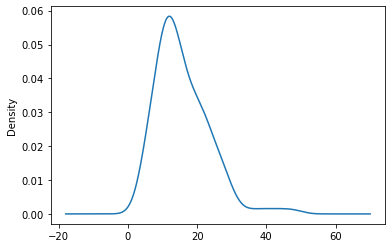

In [40]:
data1["Age"].plot.kde()

(array([14.,  6., 22., 23., 18., 21., 10., 12., 10.,  7.,  7.,  3.,  1.,
         0.,  1.,  0.,  1.,  0.,  1.,  1.]),
 array([ 4. ,  6.2,  8.4, 10.6, 12.8, 15. , 17.2, 19.4, 21.6, 23.8, 26. ,
        28.2, 30.4, 32.6, 34.8, 37. , 39.2, 41.4, 43.6, 45.8, 48. ]),
 <BarContainer object of 20 artists>)

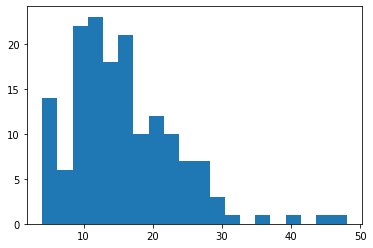

In [45]:
plt.hist(data1['Age'],bins = 20)

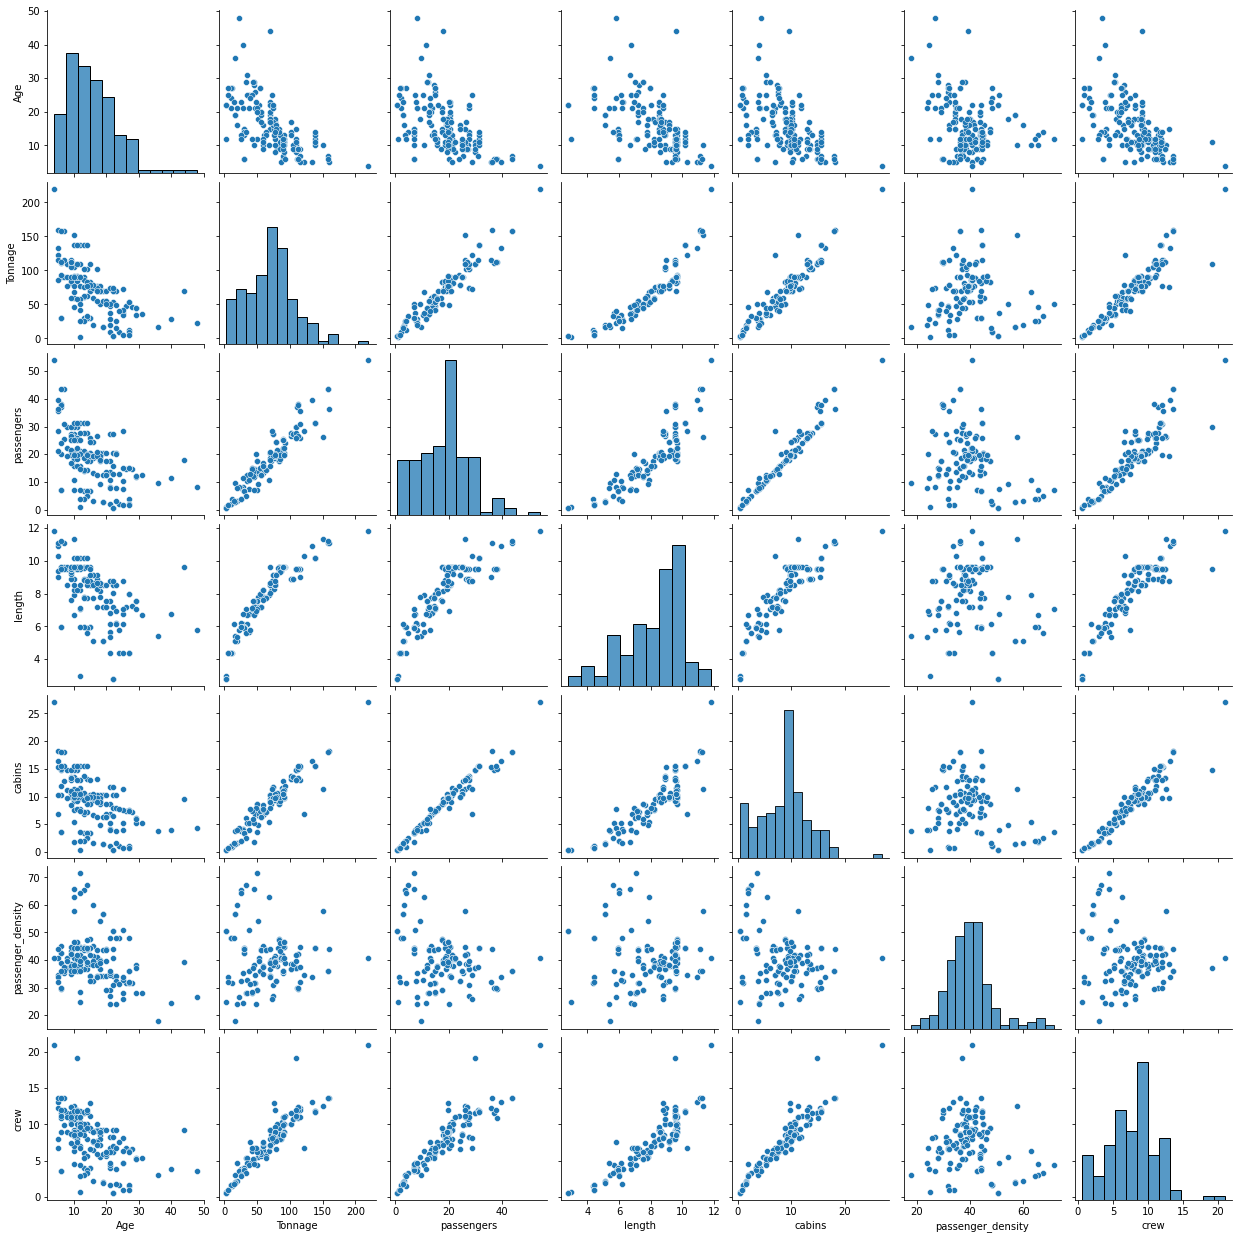

In [43]:
import seaborn as sns
sns.pairplot(data1)

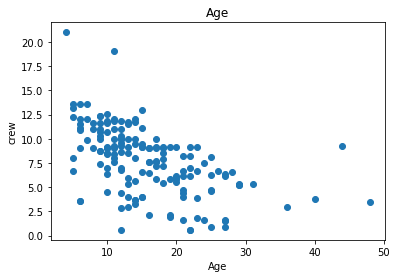

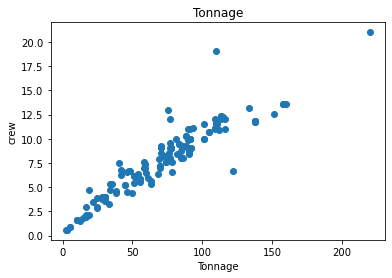

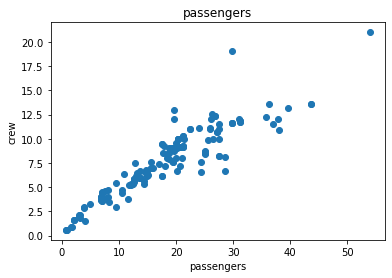

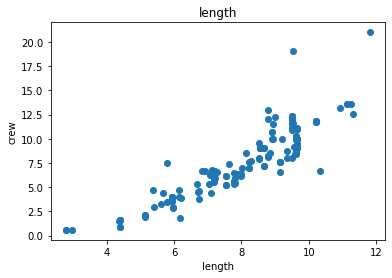

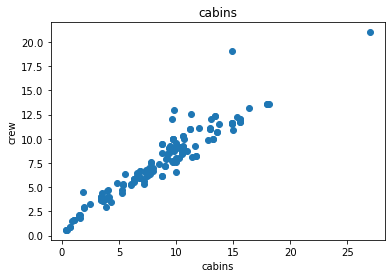

In [50]:
for i in data1.columns[:-2]:
    plt.scatter(data1[i], data1['crew'])
    plt.xlabel(i)
    plt.ylabel("crew")
    plt.title(i)
    plt.show()

In [51]:
data1.columns

Index(['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density',
       'crew'],
      dtype='object')

In [98]:
y=data1["crew"]
x=data1.drop(["crew","passenger_density"], axis=1)
x


,Age,Tonnage,passengers,length,cabins
0,6,30.277,6.94,5.94,3.55
1,6,30.277,6.94,5.94,3.55
2,26,47.262,14.86,7.22,7.43
3,11,110.000,29.74,9.53,14.88
4,17,101.353,26.42,8.92,13.21
...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33
154,14,76.800,19.60,8.79,9.67
155,25,5.350,1.58,4.40,0.74
156,27,5.350,1.67,4.40,0.74


In [97]:
y.value_counts()

9.20     10
9.00      7
12.00     4
9.99      4
11.00     4
         ..
6.80      1
8.68      1
3.80      1
1.97      1
8.48      1
Name: crew, Length: 91, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=0.4, random_state=0)

In [93]:
xtrain.shape

(94, 5)

In [94]:
ytrain

89      4.00
119    11.85
126    13.60
50      9.45
95      7.94
       ...  
9      11.50
103    11.00
67     13.13
117     2.11
47      9.21
Name: crew, Length: 94, dtype: float64

In [102]:
model = LinearRegression()

In [104]:
model.fit(xtrain, ytrain)

LinearRegression()

In [105]:
ypred = model.predict(xtest)

In [106]:
xtest

,Age,Tonnage,passengers,length,cabins
7,23,70.367,20.56,8.55,10.22
44,17,75.166,19.28,8.28,9.64
113,14,30.277,6.88,5.93,3.44
120,11,90.090,25.01,9.62,10.50
63,27,53.872,14.94,7.98,7.47
...,...,...,...,...,...
83,15,75.338,19.56,8.79,9.83
96,5,115.000,35.74,9.00,15.32
154,14,76.800,19.60,8.79,9.67
90,48,22.080,8.26,5.78,4.25


In [109]:
ytrain

89      4.00
119    11.85
126    13.60
50      9.45
95      7.94
       ...  
9      11.50
103    11.00
67     13.13
117     2.11
47      9.21
Name: crew, Length: 94, dtype: float64

In [110]:
ytest

7       9.20
44      7.66
113     3.73
120     8.48
63      6.12
       ...  
83     13.00
96     12.20
154    12.00
90      3.50
133    11.85
Name: crew, Length: 64, dtype: float64

In [111]:
ypred

array([ 8.65148707,  8.39558183,  3.72563269,  9.01403654,  6.82121233,
        8.77059498,  5.96269202,  7.74969422, 11.36455371,  5.26950854,
        7.80358826, 13.11542916,  8.41808833,  6.02534689,  8.71443533,
       11.24103095, 13.9245951 ,  9.34441433,  1.59876476,  8.84950855,
        6.19062032,  6.00302056,  6.02894166,  8.65627435,  3.90500427,
        6.97670465, 11.36455371,  8.65267957,  1.58798043,  5.769246  ,
        8.64141411,  6.02055097,  9.65125717,  8.9835477 , 20.72776791,
       12.03384621,  8.53323098,  7.23238986,  8.5939568 ,  8.51544817,
        9.15370264, 11.11239635,  8.62990456,  8.72162488, 10.41793443,
        6.82207519,  6.53925687,  7.33902004,  6.03613122,  6.39562272,
        2.9339045 , 10.94761637,  1.34202927, 12.02642007,  7.23093764,
       13.12980826,  6.27828604,  2.22272789,  0.521944  ,  8.70727855,
       11.39511863,  8.60680205,  3.82280932, 13.12621348])

In [130]:
## MAE, RMSE, Accuracy, R2 Score.


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
print(np.sqrt(mean_squared_error(ytest, ypred)))
print(mean_absolute_error(ytest, ypred))
print(r2_score(ytest, ypred)*100)
print(model.score(xtest, ytest)*100)

0.9398419210629951
0.6380737725681711
92.87138120826668
92.87138120826668
